In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = pd.read_csv("train.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39424,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
39425,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
39426,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
39427,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [3]:
df.fillna(value='missing', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39429 entries, 0 to 39428
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39429 non-null  int64 
 1   workclass        39429 non-null  object
 2   fnlwgt           39429 non-null  int64 
 3   education        39429 non-null  object
 4   educational-num  39429 non-null  int64 
 5   marital-status   39429 non-null  object
 6   occupation       39429 non-null  object
 7   relationship     39429 non-null  object
 8   race             39429 non-null  object
 9   gender           39429 non-null  object
 10  capital-gain     39429 non-null  int64 
 11  capital-loss     39429 non-null  int64 
 12  hours-per-week   39429 non-null  int64 
 13  native-country   39429 non-null  object
 14  income_>50K      39429 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.5+ MB


## Decision Tree

In [5]:
X = df.drop(['fnlwgt','income_>50K','educational-num','capital-gain','capital-loss','workclass','native-country','marital-status'], axis=1) 

y = df[['income_>50K']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [6]:
columns = []
for col in X:
    columns.append(col)


columns


['age',
 'education',
 'occupation',
 'relationship',
 'race',
 'gender',
 'hours-per-week']

In [7]:
ohe = OneHotEncoder(handle_unknown='ignore')

ohe.fit(X_train[['education', 'occupation', 'race', 'gender','relationship']])
X_train_ohe = ohe.transform(X_train[['education', 'occupation', 'race', 'gender','relationship']]).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train[['education', 'occupation', 'race', 'gender','relationship']].columns))

ohe_df.head()

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,...,race_Other,race_White,gender_Female,gender_Male,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X_train = X_train.reset_index()

In [9]:
ohe_df['age'] = X_train['age']
ohe_df['hours-per-week'] = X_train['hours-per-week']


In [10]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

clf.fit(ohe_df, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

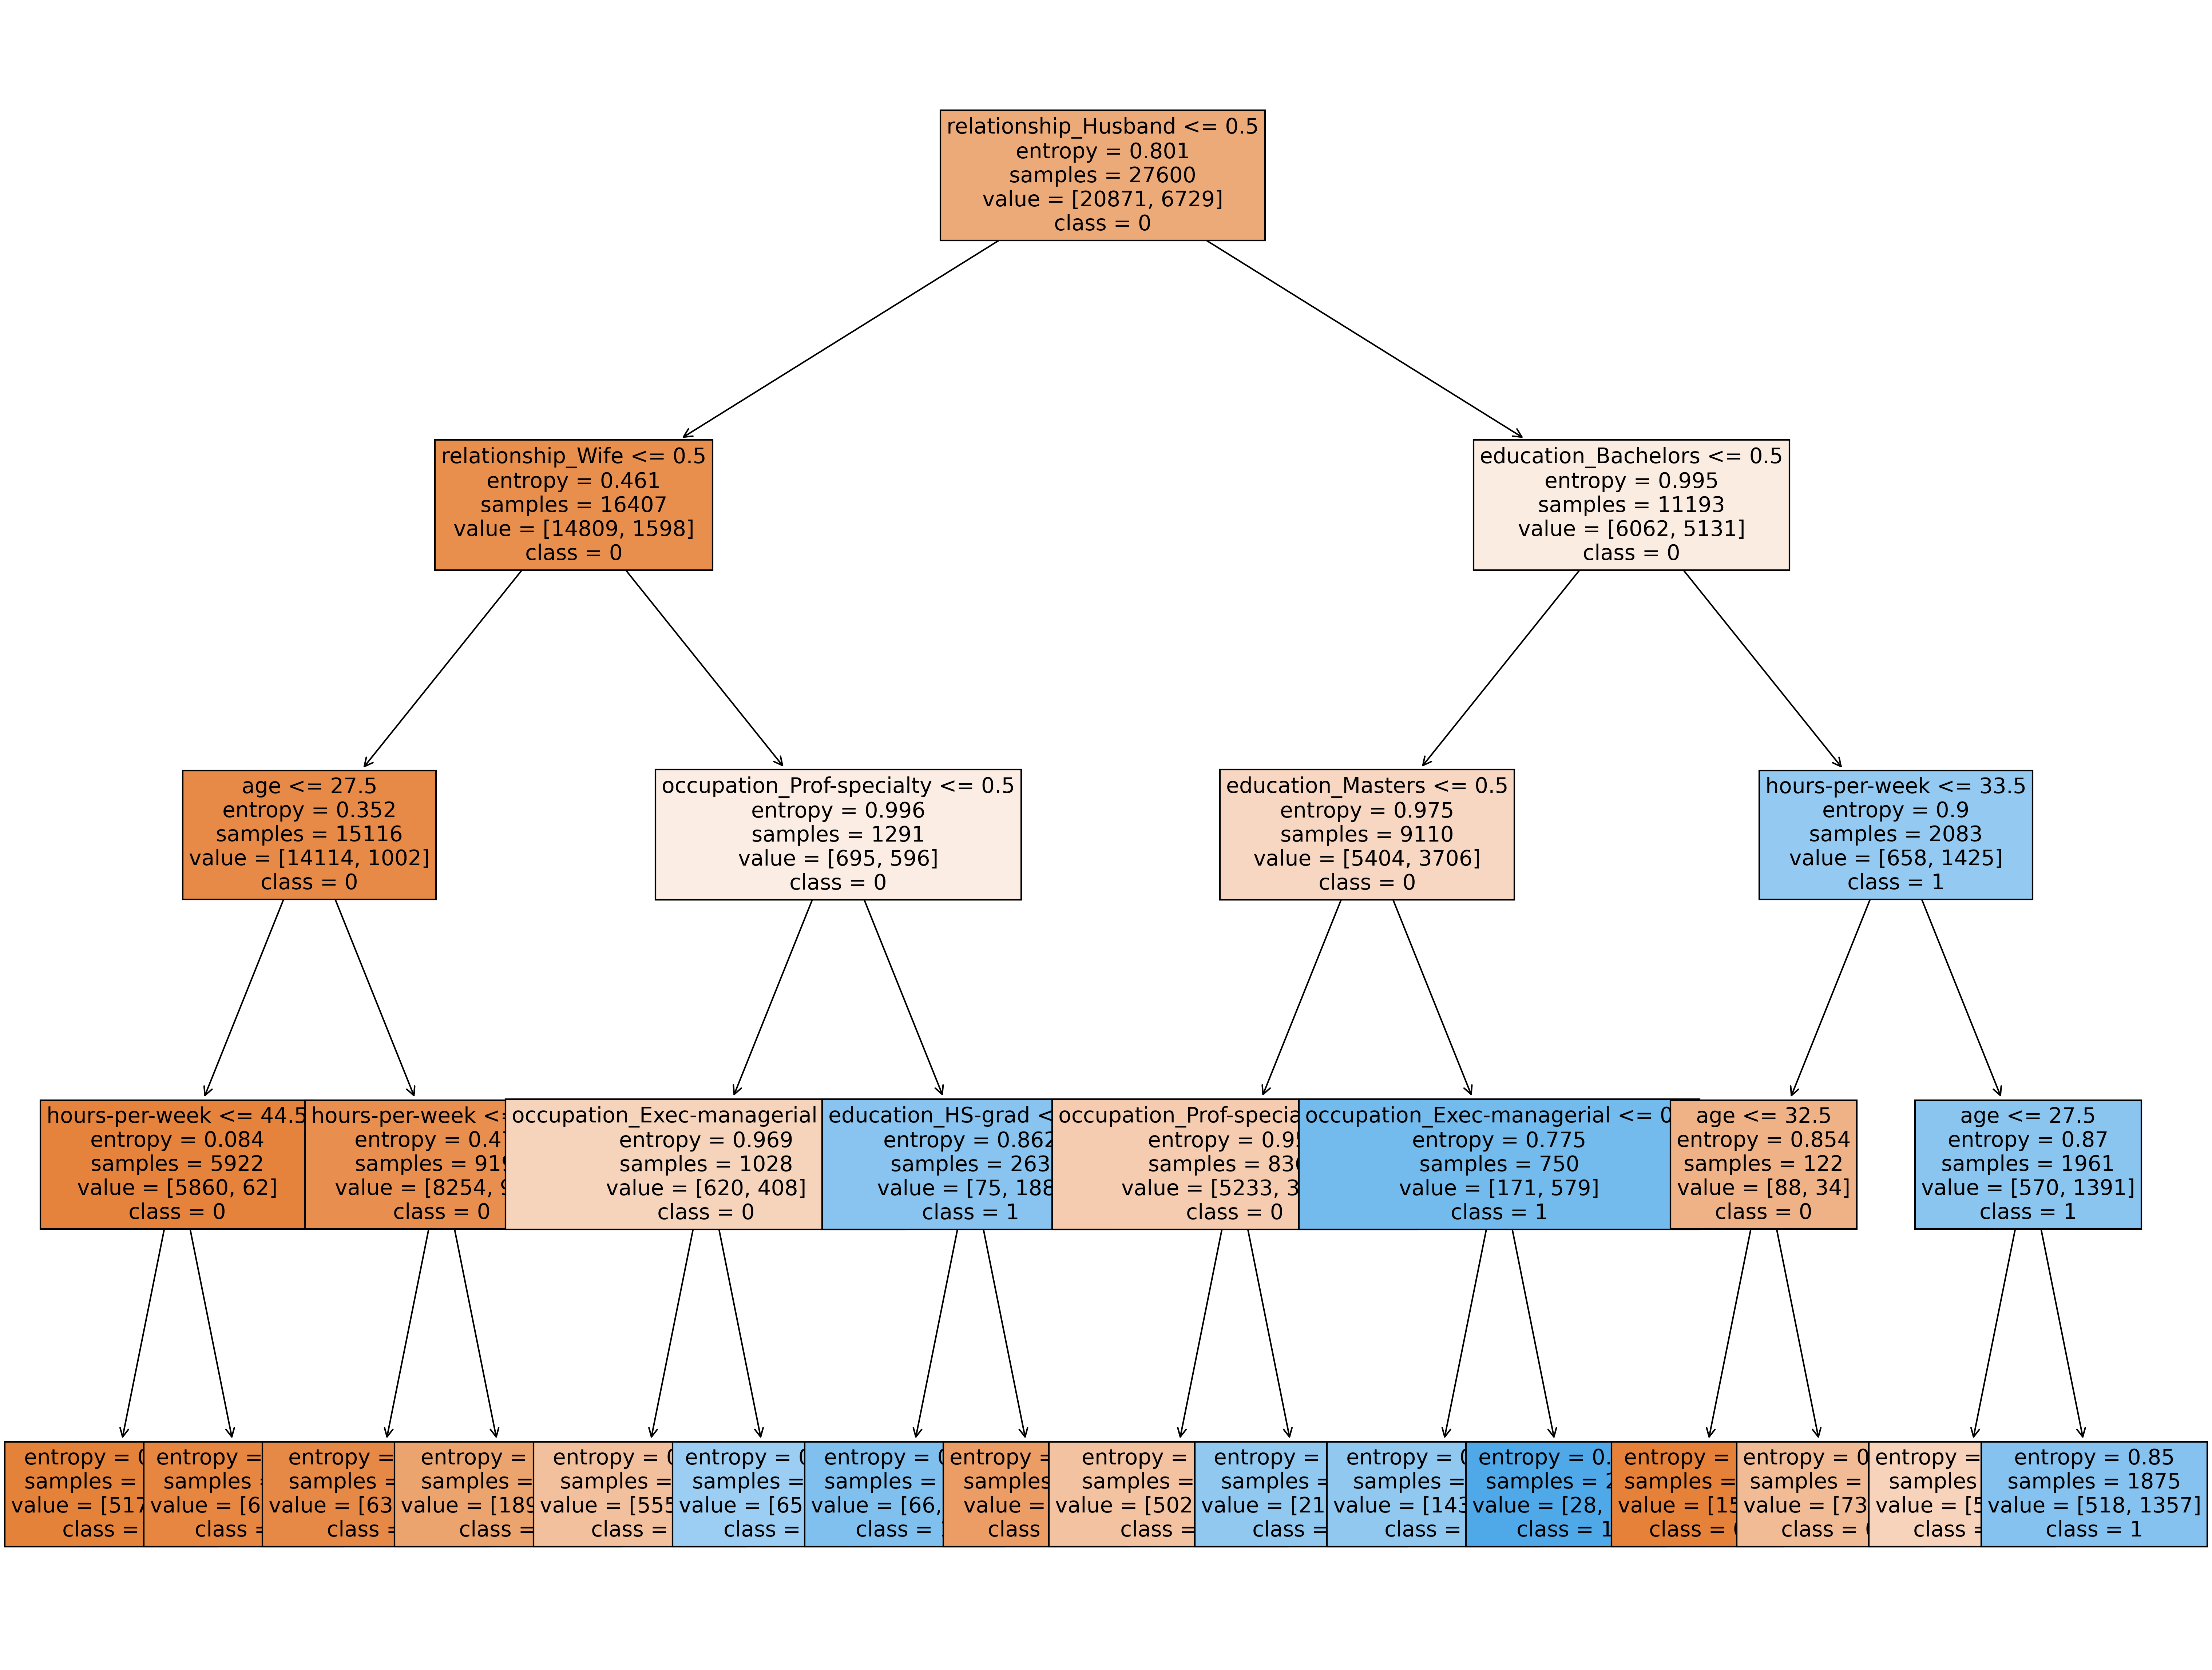

In [11]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (25,20), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True,
              fontsize=14)
plt.show()

In [12]:
X_test = X_test.reset_index()

X_test_ohe = ohe.transform(X_test[['education', 'occupation', 'race', 'gender','relationship']]).toarray()
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(X_test[['education', 'occupation', 'race', 
                                                                               'gender','relationship']].columns))
X_test_ohe_df['age'] = X_test['age']
X_test_ohe_df['hours-per-week'] = X_test['hours-per-week']

y_preds = clf.predict(X_test_ohe_df)

C:\Users\albetorres\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, y_preds) * 100))
print('Precision Score: ', precision_score(y_test, y_preds))
print(clf.score(ohe_df, y_train))


print('Classification Report: ', classification_report(y_test, y_preds, target_names=['under 50k', 'over 50k']))

Testing Accuracy for Decision Tree Classifier: 81.93%
Precision Score:  0.7432517263025737
0.8179710144927537
Classification Report:                precision    recall  f1-score   support

   under 50k       0.83      0.95      0.89      8917
    over 50k       0.74      0.41      0.53      2912

    accuracy                           0.82     11829
   macro avg       0.79      0.68      0.71     11829
weighted avg       0.81      0.82      0.80     11829



## Random Forest

In [14]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06025318,
       0.        , 0.00161166, 0.05143036, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01370491,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04655899, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.53907894, 0.        ,
       0.        , 0.        , 0.        , 0.15027528, 0.07582929,
       0.06125737])

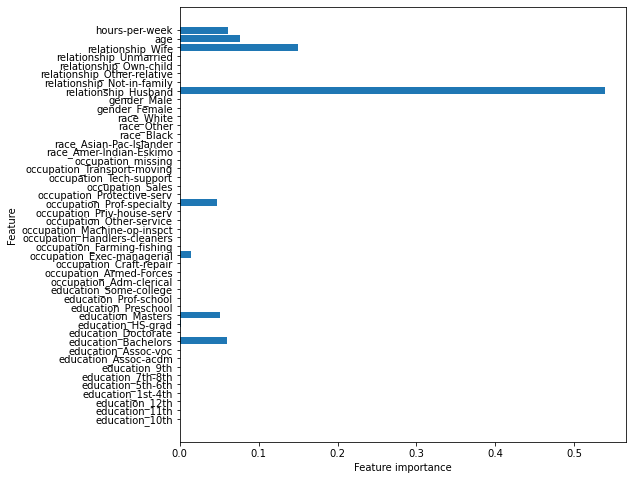

In [15]:
def plot_feature_importances(model):
    n_features = ohe_df.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), ohe_df.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)

In [16]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 8, class_weight = 'balanced')
forest.fit(ohe_df, y_train)

C:\Users\albetorres\AppData\Local\Temp\ipykernel_3900\868609342.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(ohe_df, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=8)

In [17]:
forest_preds = forest.predict(X_test_ohe_df)

In [18]:
# Training accuracy score
forest.score(ohe_df, y_train)

0.7678260869565218

In [19]:
# Test accuracy score
forest.score(X_test_ohe_df, y_test)

0.7609265364781469

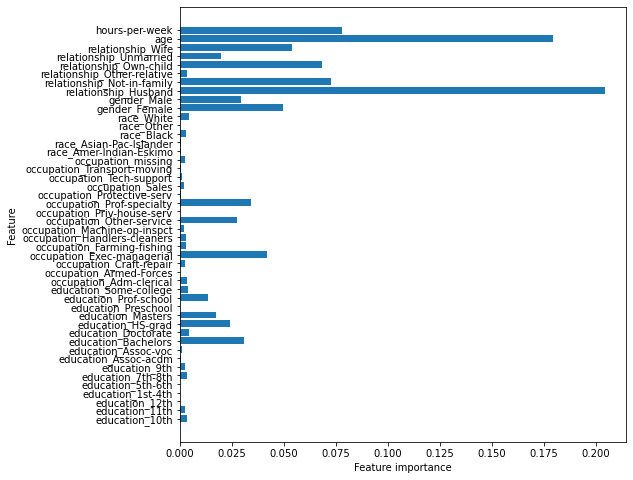

In [20]:
plot_feature_importances(forest)

In [21]:
print('Classification Report: ', classification_report(y_test, forest_preds, target_names=['under 50k', 'over 50k']))

Classification Report:                precision    recall  f1-score   support

   under 50k       0.94      0.73      0.82      8917
    over 50k       0.51      0.86      0.64      2912

    accuracy                           0.76     11829
   macro avg       0.72      0.79      0.73     11829
weighted avg       0.83      0.76      0.78     11829

